This notebook produces a comparison of DES 4 photo-z estimate methods, an astroML Nadaraya Watson photo-z estimation trained on DES photometry, and the spectroscopic redshift.  The tables used were produced by matching a catalog of known quasars [Drexel local file: GTR-ADM-QSO-ir-testhighz_findbw_lup_2016_starclean.fits] to the DES SVA1 "gold" catalog and then cross-matching to the 4 DES photo-z catalogs.  

GTR quasars: 4193, 
GTR quasars matched to DES Sva1: 35

In [1]:
import numpy as np
from astropy.table import Table
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report
from astroML.linear_model import NadarayaWatson
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import palettable
import richardsplot as rplot
%matplotlib inline

These cells load in our data tables, then separate out the relevant data for training the model.  The model is then given our test set and produces a photo-z prediction.  The resulting predictions are then sorted by object classification. This process happens once for each of the four DES photo-z methods before plotting.  If not interested in the minute details, skip to cell 14 for the plots. 

In [2]:
#read in table
destable_annz = Table.read('gtr_qso_+dessva1_annz.fits')
#prevent a bug involving MaskedColumns
destable_annz = destable_annz.filled()

In [3]:
destable_bpz = Table.read('gtr_qso_+dessva1_bpz.fits')
destable_bpz = destable_bpz.filled()

In [4]:
destable_skynet = Table.read('gtr_qso_+dessva1_skynet.fits')
destable_skynet = destable_skynet.filled()

In [5]:
destable_tpz = Table.read('gtr_qso_+dessva1_tpz.fits')
destable_tpz = destable_tpz.filled()

In [6]:
#stack photometry bands, des photo-z, and des object class
X_annz = np.vstack([destable_annz['MAG_AUTO_G'], destable_annz['MAG_AUTO_R'], destable_annz['MAG_AUTO_I'], destable_annz['MAG_AUTO_Z'], destable_annz['Z_MEAN'], destable_annz['MODEST_CLASS'] ]).T
y_annz = np.array(destable_annz['zspec'])
#split into training and test sets of 1/2 and 1/2 respectively
X_train_annz, X_test_annz, y_train_annz, y_test_annz = train_test_split(X_annz, y_annz, test_size=0.5, random_state=76)
#empty arrays for photometry bands
X_traintrue_annz = np.empty((X_train_annz.shape[0], X_train_annz.shape[1]-2), dtype=float) 
X_testtrue_annz = np.empty((X_test_annz.shape[0], X_test_annz.shape[1]-2), dtype=float)
#empty array for des photo-z
DesZs_annz = np.empty((X_test_annz.shape[0], 1), dtype=float) 
#empty array for object class
ModestClass_annz = np.empty((X_test_annz.shape[0], 1), dtype=int)
#loop through and separate photometry bands, des photo-z and object class
for i in range(len(X_train_annz)):
    X_traintrue_annz[i] = X_train_annz[i][:4] #first four entries i.e. the four photometry bands
for i in range(len(X_test_annz)):
    X_testtrue_annz[i] = X_test_annz[i][:4]
    DesZs_annz[i] = X_test_annz[i][4] #fifth entry, the des photo-z
    ModestClass_annz[i] = X_test_annz[i][5] #sixth entry, the des object classification
#initialize model with gaussian kernel of width 0.05
model_annz = NadarayaWatson('gaussian', 0.05)
#fit model to training set
model_annz.fit(X_traintrue_annz, y_train_annz)
#produce a photo-z estimate
pred_annz = model_annz.predict(X_testtrue_annz)

In [7]:
X_bpz = np.vstack([destable_bpz['MAG_AUTO_G'], destable_bpz['MAG_AUTO_R'], destable_bpz['MAG_AUTO_I'], destable_bpz['MAG_AUTO_Z'], destable_bpz['Z_MEAN'], destable_bpz['MODEST_CLASS'] ]).T
y_bpz = np.array(destable_bpz['zspec'])
X_train_bpz, X_test_bpz, y_train_bpz, y_test_bpz = train_test_split(X_bpz, y_bpz, test_size=0.5, random_state=76)
X_traintrue_bpz = np.empty((X_train_bpz.shape[0], X_train_bpz.shape[1]-2), dtype=float) 
X_testtrue_bpz = np.empty((X_test_bpz.shape[0], X_test_bpz.shape[1]-2), dtype=float)
DesZs_bpz = np.empty((X_test_bpz.shape[0], 1), dtype=float) 
ModestClass_bpz = np.empty((X_test_bpz.shape[0], 1), dtype=int)

for i in range(len(X_train_bpz)):
    X_traintrue_bpz[i] = X_train_bpz[i][:4] 
for i in range(len(X_test_bpz)):
    X_testtrue_bpz[i] = X_test_bpz[i][:4]
    DesZs_bpz[i] = X_test_bpz[i][4]
    ModestClass_bpz[i] = X_test_bpz[i][5] 
    
model_bpz = NadarayaWatson('gaussian', 0.05)
model_bpz.fit(X_traintrue_bpz, y_train_bpz)
pred_bpz = model_bpz.predict(X_testtrue_bpz)

In [8]:
X_skynet = np.vstack([destable_skynet['MAG_AUTO_G'], destable_skynet['MAG_AUTO_R'], destable_skynet['MAG_AUTO_I'], destable_skynet['MAG_AUTO_Z'], destable_skynet['Z_MEAN'], destable_skynet['MODEST_CLASS'] ]).T
y_skynet = np.array(destable_skynet['zspec'])
X_train_skynet, X_test_skynet, y_train_skynet, y_test_skynet = train_test_split(X_skynet, y_skynet, test_size=0.5, random_state=76)
X_traintrue_skynet = np.empty((X_train_skynet.shape[0], X_train_skynet.shape[1]-2), dtype=float) 
X_testtrue_skynet = np.empty((X_test_skynet.shape[0], X_test_skynet.shape[1]-2), dtype=float)
DesZs_skynet = np.empty((X_test_skynet.shape[0], 1), dtype=float) 
ModestClass_skynet = np.empty((X_test_skynet.shape[0], 1), dtype=int)

for i in range(len(X_train_skynet)):
    X_traintrue_skynet[i] = X_train_skynet[i][:4] 
for i in range(len(X_test_skynet)):
    X_testtrue_skynet[i] = X_test_skynet[i][:4]
    DesZs_skynet[i] = X_test_skynet[i][4]
    ModestClass_skynet[i] = X_test_skynet[i][5] 
    
model_skynet = NadarayaWatson('gaussian', 0.05)
model_skynet.fit(X_traintrue_skynet, y_train_skynet)
pred_skynet = model_skynet.predict(X_testtrue_skynet)

In [9]:
X_tpz = np.vstack([destable_tpz['MAG_AUTO_G'], destable_tpz['MAG_AUTO_R'], destable_tpz['MAG_AUTO_I'], destable_tpz['MAG_AUTO_Z'], destable_tpz['Z_MEAN'], destable_tpz['MODEST_CLASS'] ]).T
y_tpz = np.array(destable_tpz['zspec'])
X_train_tpz, X_test_tpz, y_train_tpz, y_test_tpz = train_test_split(X_tpz, y_tpz, test_size=0.5, random_state=76)
X_traintrue_tpz = np.empty((X_train_tpz.shape[0], X_train_tpz.shape[1]-2), dtype=float) 
X_testtrue_tpz = np.empty((X_test_tpz.shape[0], X_test_tpz.shape[1]-2), dtype=float)
DesZs_tpz = np.empty((X_test_tpz.shape[0], 1), dtype=float) 
ModestClass_tpz = np.empty((X_test_tpz.shape[0], 1), dtype=int)

for i in range(len(X_train_tpz)):
    X_traintrue_tpz[i] = X_train_tpz[i][:4] 
for i in range(len(X_test_tpz)):
    X_testtrue_tpz[i] = X_test_tpz[i][:4]
    DesZs_tpz[i] = X_test_tpz[i][4]
    ModestClass_tpz[i] = X_test_tpz[i][5] 
    
model_tpz = NadarayaWatson('gaussian', 0.05)
model_tpz.fit(X_traintrue_tpz, y_train_tpz)
pred_tpz = model_tpz.predict(X_testtrue_tpz)

In [10]:
print len(pred_annz)
#empty arrays for object sorting
stars_annz = np.empty(shape=(0,3))
gals_annz = np.empty(shape=(0,3))
uns_annz = np.empty(shape=(0,3))
#loop through and sort objects based on des object class
for i in range(len(ModestClass_annz)):
    if ModestClass_annz[i] == 2:
        stars_annz = np.append(stars_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)
    elif ModestClass_annz[i] == 1:
        gals_annz = np.append(gals_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)
    else:
        uns_annz = np.append(uns_annz, [[pred_annz[i], DesZs_annz[i], y_test_annz[i]]], axis = 0)
print len(stars_annz)
print len(gals_annz)
print len(uns_annz)

18
16
1
1


In [11]:
stars_bpz = np.empty(shape=(0,3))
gals_bpz = np.empty(shape=(0,3))
uns_bpz = np.empty(shape=(0,3))
for i in range(len(ModestClass_bpz)):
    if ModestClass_bpz[i] == 2:
        stars_bpz = np.append(stars_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)
    elif ModestClass_bpz[i] == 1:
        gals_bpz = np.append(gals_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)
    else:
        uns_bpz = np.append(uns_bpz, [[pred_bpz[i], DesZs_bpz[i], y_test_bpz[i]]], axis = 0)

In [12]:
stars_skynet = np.empty(shape=(0,3))
gals_skynet = np.empty(shape=(0,3))
uns_skynet = np.empty(shape=(0,3))
for i in range(len(ModestClass_skynet)):
    if ModestClass_skynet[i] == 2:
        stars_skynet = np.append(stars_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)
    elif ModestClass_skynet[i] == 1:
        gals_skynet = np.append(gals_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)
    else:
        uns_skynet = np.append(uns_skynet, [[pred_skynet[i], DesZs_skynet[i], y_test_skynet[i]]], axis = 0)

In [13]:
stars_tpz = np.empty(shape=(0,3))
gals_tpz = np.empty(shape=(0,3))
uns_tpz = np.empty(shape=(0,3))
for i in range(len(ModestClass_tpz)):
    if ModestClass_tpz[i] == 2:
        stars_tpz = np.append(stars_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)
    elif ModestClass_tpz[i] == 1:
        gals_tpz = np.append(gals_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)
    else:
        uns_tpz = np.append(uns_tpz, [[pred_tpz[i], DesZs_tpz[i], y_test_tpz[i]]], axis = 0)

c:\python27\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


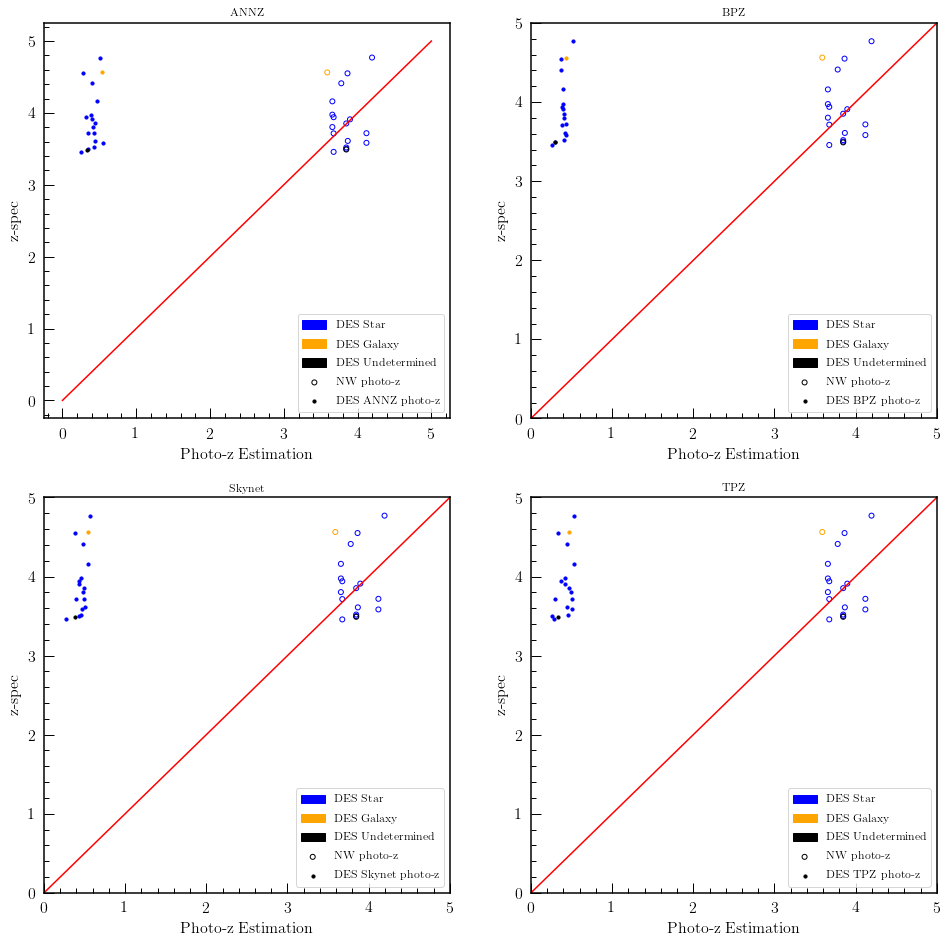

In [14]:
plt.figure(figsize=(16,16))
plt.subplot(221)
plt.scatter(stars_annz.T[0], stars_annz.T[2], s=25, facecolor='none', edgecolor='blue')
plt.scatter(stars_annz.T[1], stars_annz.T[2], s=10, c='blue')
plt.scatter(gals_annz.T[0], gals_annz.T[2], s=25, facecolor='none', edgecolor='orange')
plt.scatter(gals_annz.T[1], gals_annz.T[2], s=10, c='orange')
legendhelp1_annz = plt.scatter(uns_annz.T[0], uns_annz.T[2], s=25, facecolor='none', edgecolor='k', label = 'NW photo-z')
legendhelp2_annz = plt.scatter(uns_annz.T[1], uns_annz.T[2], s=10, c='k', label = 'DES ANNZ photo-z')
plt.plot([0,1,2,3,4,5], 'r') 
#plt.xlim(0,5)
#plt.ylim(0,5)
plt.xlabel('Photo-z Estimation')
plt.ylabel('z-spec')
plt.title('ANNZ')
orange_patch = mpatches.Patch(color='orange', label='DES Galaxy')
blue_patch = mpatches.Patch(color='blue', label='DES Star')
black_patch = mpatches.Patch(color='k', label='DES Undetermined')
plt.legend(handles=[blue_patch, orange_patch, black_patch, legendhelp1_annz, legendhelp2_annz])
plt.subplot(222)
plt.scatter(stars_bpz.T[0], stars_bpz.T[2], s=25, facecolor='none', edgecolor='blue')
plt.scatter(stars_bpz.T[1], stars_bpz.T[2], s=10, c='blue')
plt.scatter(gals_bpz.T[0], gals_bpz.T[2], s=25, facecolor='none', edgecolor='orange')
plt.scatter(gals_bpz.T[1], gals_bpz.T[2], s=10, c='orange')
legendhelp1_bpz = plt.scatter(uns_bpz.T[0], uns_bpz.T[2], s=25, facecolor='none', edgecolor='k', label = 'NW photo-z')
legendhelp2_bpz = plt.scatter(uns_bpz.T[1], uns_bpz.T[2], s=10, c='k', label = 'DES BPZ photo-z')
plt.plot([0,1,2,3,4,5], 'r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Photo-z Estimation')
plt.ylabel('z-spec')
plt.title('BPZ')
plt.legend(handles=[blue_patch, orange_patch, black_patch, legendhelp1_bpz, legendhelp2_bpz])
plt.subplot(223)
plt.scatter(stars_skynet.T[0], stars_skynet.T[2], s=25, facecolor='none', edgecolor='blue')
plt.scatter(stars_skynet.T[1], stars_skynet.T[2], s=10, c='blue')
plt.scatter(gals_skynet.T[0], gals_skynet.T[2], s=25, facecolor='none', edgecolor='orange')
plt.scatter(gals_skynet.T[1], gals_skynet.T[2], s=10, c='orange')
legendhelp1_skynet = plt.scatter(uns_skynet.T[0], uns_skynet.T[2], s=25, facecolor='none', edgecolor='k', label = 'NW photo-z')
legendhelp2_skynet = plt.scatter(uns_skynet.T[1], uns_skynet.T[2], s=10, c='k', label = 'DES Skynet photo-z')
plt.plot([0,1,2,3,4,5], 'r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Photo-z Estimation')
plt.ylabel('z-spec')
plt.title('Skynet')
plt.legend(handles=[blue_patch, orange_patch, black_patch, legendhelp1_skynet, legendhelp2_skynet])
plt.subplot(224)
plt.scatter(stars_tpz.T[0], stars_tpz.T[2], s=25, facecolor='none', edgecolor='blue')
plt.scatter(stars_tpz.T[1], stars_tpz.T[2], s=10, c='blue')
plt.scatter(gals_tpz.T[0], gals_tpz.T[2], s=25, facecolor='none', edgecolor='orange')
plt.scatter(gals_tpz.T[1], gals_tpz.T[2], s=10, c='orange')
legendhelp1_tpz = plt.scatter(uns_tpz.T[0], uns_tpz.T[2], s=25, facecolor='none', edgecolor='k', label = 'NW photo-z')
legendhelp2_tpz = plt.scatter(uns_tpz.T[1], uns_tpz.T[2], s=10, c='k', label = 'DES TPZ photo-z')
plt.plot([0,1,2,3,4,5], 'r')
plt.xlim(0,5)
plt.ylim(0,5)
plt.xlabel('Photo-z Estimation')
plt.ylabel('z-spec')
plt.title('TPZ')
plt.legend(handles=[blue_patch, orange_patch, black_patch, legendhelp1_tpz, legendhelp2_tpz])

Above plots show comparisons between the 4 DES photo-z methods and our Nadaraya-Watson method, both as compared to the spectroscopic redshift of the object.  The open circles are the NW predictions and the closed points are DES's photometric redshift estimates.  The red line represents the line along which photometric redshift equals spectroscopic redshift i.e. a "correct" photo-z estimate.  This set of four plots is colored according to DES's object classification, though our test set here contains mostly objects classified by DES as stars i.e. point sources. 